# Initial Setup

In [1]:
# turning off warnings for the notebook
import warnings
warnings.filterwarnings('ignore')

# for data manipulation
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# displaying all the columns and row throughout the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading in the raw data and creating a copy of it to work on
df_master = pd.read_excel("Data.xlsx")
df = df_master.copy()

Taking a look at the first few entries in the dataframe.

In [3]:
df[:20]

,customerId,productId,date,qtyPurchased,transactionAmount
0,C1,P1,2017-01-01,7,20.3436
1,C1,P1,2017-02-01,6,17.5826
2,C1,P1,2017-03-01,7,21.9440
3,C1,P1,2017-04-01,7,21.2027
4,C1,P1,2017-05-01,8,26.9709
5,C1,P1,2017-06-01,7,25.1740
6,C1,P1,2017-07-01,7,24.2406
7,C1,P1,2017-08-01,8,26.1250
8,C1,P1,2017-09-01,7,22.8166
9,C1,P1,2017-10-01,6,20.9907


Checking for duplicated rows. None found.

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(16560, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16560 entries, 0 to 16559
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerId         16560 non-null  object        
 1   productId          16560 non-null  object        
 2   date               16560 non-null  datetime64[ns]
 3   qtyPurchased       16560 non-null  int64         
 4   transactionAmount  16560 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 647.0+ KB


There are no missing values in the raw data. Overall, the provided data looks clean and ready for analysis. 

In [7]:
df.describe()

,qtyPurchased,transactionAmount
count,16560.000000,16560.000000
mean,13.155133,77.043838
std,20.721138,166.298750
min,0.000000,0.000000
25%,2.000000,9.062700
50%,5.000000,26.263100
75%,15.000000,61.895500
max,223.000000,1980.412100


Used .describe to get an overview of the numerical variables.

In [8]:
df["customerId"].value_counts()

C6     552
C12    552
C9     552
C1     552
C17    552
C26    552
C3     552
C20    552
C7     552
C4     552
C13    552
C30    552
C11    552
C21    552
C29    552
C25    552
C19    552
C8     552
C15    552
C23    552
C16    552
C27    552
C28    552
C22    552
C24    552
C10    552
C5     552
C2     552
C14    552
C18    552
Name: customerId, dtype: int64

This shows that all the customers have equal number of transactions (552).

In [9]:
df["productId"].value_counts()

P1     1380
P11    1380
P12    1380
P3     1380
P10    1380
P9     1380
P4     1380
P8     1380
P6     1380
P5     1380
P2     1380
P7     1380
Name: productId, dtype: int64

All the products are equally represented in the given data.

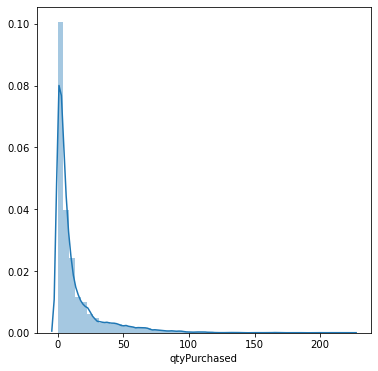

In [10]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.distplot(df["qtyPurchased"]);

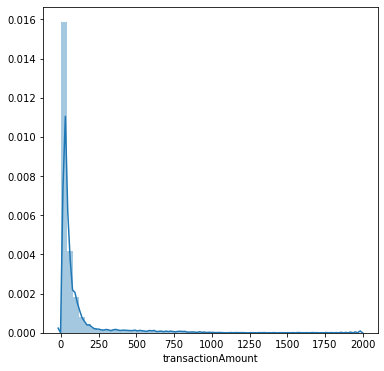

In [11]:
sns.distplot(df["transactionAmount"]);

Plotted and took a quick look at the variables for transaction amount and quantity purchased. Both the distributions are right-skewed.

# Methodology 

RFM (Recency, Frequency, Monetary) analysis is a simple tool that has been used for a long time to segment customers depending on their transactional behaviour. RFM values customers on three different metrics and provides an easy approach to target specific customer segments and therefore, helps in reducing marketing costs and improves return on advertising. 

Recency variable quantifies the time duration since the last transaction the customer had with the buisness. Frequency variable captures the total number of good/services that the customer has bought from the buisness. Monetary variable captures the sum total monetary value of the transactions the customer has had with the buisness. All 3 variables capture important attributes of customer behaviour and therefore are used to segment customer base into meaningful sub-groups. Each of these sub-groups can be analysed and targeted differently by the buisness to maximize their profits.  

For the given analysis, I have taken inspiration from RFM analysis and I have used a modified version of it. Recency cannot be used as a variable here since for all the customers in the given dataset, there is atleast one entry for the latest time frame (i.e. Oct'2020). Therefore, value of recency would be same across all the customers and this feature would be redundant. 

The variables for Frequency and Monetary value can be generated from the provided data for all 30 customers by calculation total number of items bought and total monetary value of items bought respectively. In place of Recency, I generated my own feature Continuity and used it in analysis. Just like Recency, Continuity also captures the customer loyalty. In the data set I noticed that for certain months, some customers are not buying particular products and therefore, there is 0 registered in the qtyPurchased column against these transactions. In order to quantify how many times a customer is not ordering an item, I computed the ratio of non-zero entries in qtyPurchased column against each customer and stored it in the continuity variable. For example, a customer having Continuity as 1 implies that he is ordering consistently across all product types whereas Continuity of say 0.7 signifies that customer is not ordeing for 30% of the total product types across the time frame under consideration. Hence, Continuity variable captures an important aspect of customer behaviour and therefore, I used it in segmentation analysis.   

Finally, I used K-means algorithm on Continuity, Frequency and Monetary variables to segment customers as per their transactional behaviour.

Note: for more on RFM analysis refer:
1. https://searchdatamanagement.techtarget.com/definition/RFM-analysis#:~:text=RFM%20analysis%20is%20a%20marketing,and%20perform%20targeted%20marketing%20campaigns.
2. https://towardsdatascience.com/who-is-your-golden-goose-cohort-analysis-50c9de5dbd31
3. https://www.dase-analytics.com/blog/en/rfm-analysis/

# Feature Engineering

As per the logic dicussed in methodology section above, I first calculated continuity, frequency and monetary variables for all 30 customers.

In [12]:
continuityscore = []

for j in range(0,30):
    
    customerId = df['customerId'].unique()[j]
    temp = (df[df['customerId']==customerId].qtyPurchased != 0)
    count = 0

    for i in range(0,temp.shape[0]):
        if (temp.iloc[i] == True):
            count += 1
        else:
            continue

    continuityscore.append(count/temp.shape[0])
    
    

In [13]:
continuityscore

[1.0,
 0.9836956521739131,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9547101449275363,
 1.0,
 0.8804347826086957,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9891304347826086,
 0.9565217391304348,
 0.9112318840579711,
 0.9239130434782609,
 1.0,
 0.6956521739130435,
 0.6938405797101449,
 0.6739130434782609,
 0.6503623188405797,
 0.6521739130434783,
 0.6739130434782609,
 0.6521739130434783,
 0.717391304347826,
 0.6938405797101449,
 0.6394927536231884,
 0.6394927536231884,
 0.6503623188405797]

In [14]:
frequencyscore = []

for j in range(0,30):
    
    customerId = df['customerId'].unique()[j]
    frequencyscore.append(df[df['customerId']==customerId].qtyPurchased.sum()) 
    

In [15]:
monetoryscore = []

for j in range(0,30):
    
    customerId = df['customerId'].unique()[j]
    monetoryscore.append(df[df['customerId']==customerId].transactionAmount.sum()) 


In [16]:
data = {'continuity': continuityscore, 'frequency': frequencyscore, 'monetory': monetoryscore}

df_analysis = pd.DataFrame(data)

I created a new dataframe (df_analysis) which contains values for continuity pattern in purchases, frequency of items bought and overall monetary impact for each customer. These scores would be used to segment customers depending on their transactional behaviour using K-means algorithm.

In [17]:
df_analysis

,continuity,frequency,monetory
0,1.000000,7297,46637.6100
1,0.983696,7613,36299.3341
2,1.000000,4317,32959.4547
3,1.000000,8816,55217.8914
4,1.000000,12610,85256.5827
5,1.000000,4575,23084.5374
6,0.954710,5789,40283.7516
7,1.000000,7995,55251.4163
8,0.880435,6579,29823.0293
9,1.000000,9915,62247.8745


In df_analysis, rows 0-29 correspond to customers C1-C30 respectively. (Since numbering starts from 0 in python, thus 0 represent C1 and so on.) 

In [18]:
df_analysis.describe()

,continuity,frequency,monetory
count,30.000000,30.000000,30.000000
mean,0.854408,7261.633333,42528.198370
std,0.157063,3225.099972,21351.832014
min,0.639493,3732.000000,17142.189000
25%,0.678895,5476.250000,30914.330000
50%,0.939312,6760.000000,35544.004100
75%,1.000000,7976.500000,46062.833950
max,1.000000,20621.000000,127172.670700


Scales of all the variables are different and this will affect model building since K-means is based on Euclidean distance. Thus, the variables need to be scaled.

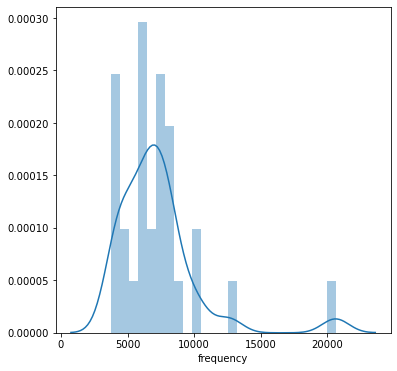

In [19]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.distplot(df_analysis["frequency"], bins=25);

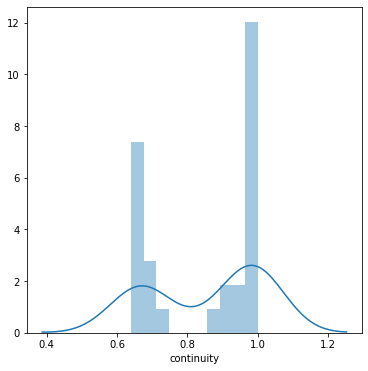

In [20]:
sns.distplot(df_analysis["continuity"], bins=10);

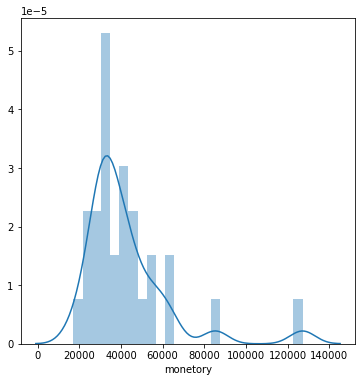

In [21]:
# monetary spelling correct
sns.distplot(df_analysis["monetory"], bins=25);

Monetary and Frequency variable are non-symmetric and right-skewed. Thus to reduce the skewness, I log transformed these two variables.

In [22]:
df_analysis['frequency'] = df_analysis['frequency'].apply(lambda x: np.log(x))
df_analysis['monetory'] = df_analysis['monetory'].apply(lambda x: np.log(x))

Next I scale all the variables using MinMaxScaler.

In [23]:
scaler_1 = MinMaxScaler()
df_analysis['frequency'] = scaler_1.fit_transform(np.array(df_analysis['frequency']).reshape(-1, 1))

scaler_2 = MinMaxScaler()
df_analysis['continuity'] = scaler_1.fit_transform(np.array(df_analysis['continuity']).reshape(-1, 1))

scaler_3 = MinMaxScaler()
df_analysis['monetory'] = scaler_1.fit_transform(np.array(df_analysis['monetory']).reshape(-1, 1))

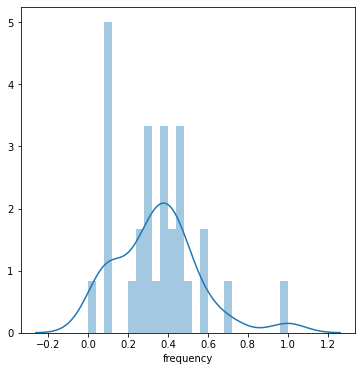

In [24]:
sns.distplot(df_analysis["frequency"], bins=25);

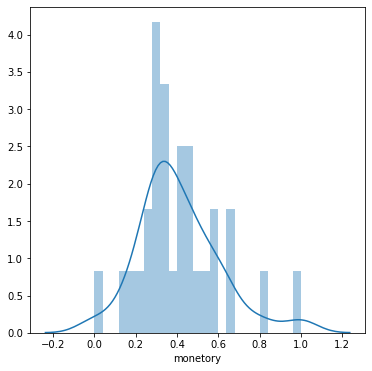

In [25]:
sns.distplot(df_analysis["monetory"], bins=25);

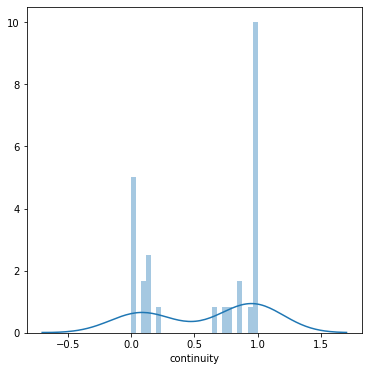

In [26]:
sns.distplot(df_analysis["continuity"], bins=25);

All the three variables look symmetric now (approximately). Thus, the variables are good for model building now.

In [27]:
df_analysis.describe()

,continuity,frequency,monetory
count,30.000000,30.000000,30.000000
mean,0.596147,0.348598,0.409597
std,0.435674,0.210811,0.200922
min,0.000000,0.000000,0.000000
25%,0.109296,0.224028,0.294223
50%,0.831658,0.347334,0.363773
75%,1.000000,0.444345,0.493126
max,1.000000,1.000000,1.000000


In [28]:
df_analysis

,continuity,frequency,monetory
0,1.000000,0.392262,0.499433
1,0.954774,0.417063,0.374379
2,1.000000,0.085187,0.326215
3,1.000000,0.502891,0.583704
4,1.000000,0.712279,0.800459
5,1.000000,0.119145,0.148513
6,0.874372,0.256829,0.426349
7,1.000000,0.445705,0.584007
8,0.668342,0.331666,0.276316
9,1.000000,0.571618,0.643503


In [29]:
one_quant = df_analysis.describe().continuity[4]
mean = df_analysis.describe().continuity[5]
three_quant = df_analysis.describe().continuity[6]


df_analysis['continuity_score'] = df_analysis['continuity'].apply(
    lambda x: 1 if x <= one_quant else (2 if (x <= mean and x > one_quant) else 3))

In [30]:
one_quant = df_analysis.describe().frequency[4]
mean = df_analysis.describe().frequency[5]
three_quant = df_analysis.describe().frequency[6]


df_analysis['frequency_score'] = df_analysis['frequency'].apply(lambda x: 1 if x <= one_quant else (
    2 if (x <= mean and x > one_quant) else (3 if (x > mean and x <= three_quant) else 4)))

In [31]:
one_quant = df_analysis.describe().monetory[4]
mean = df_analysis.describe().monetory[5]
three_quant = df_analysis.describe().monetory[6]


df_analysis['monetory_score'] = df_analysis['monetory'].apply(lambda x: 1 if x <= one_quant else (
    2 if (x <= mean and x > one_quant) else (3 if (x > mean and x <= three_quant) else 4)))

In the above three code blocks, I converted variables continuity, frequency and monetary into a score based format. If a particular value was within the first quarantile of the the distribution for that variable then I assigned it score 1, if it was in second quarantile then score was 2 and so on. The reasoning behind converting to score was to make the results more intutive and interpretable. K-means clustering can also be performed on the original variables as well, without converting them to score format.

In [32]:
df_analysis.describe()

,continuity,frequency,monetory,continuity_score,frequency_score,monetory_score
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.596147,0.348598,0.409597,2.233333,2.500000,2.500000
std,0.435674,0.210811,0.200922,0.858360,1.167077,1.167077
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.109296,0.224028,0.294223,1.250000,1.250000,1.250000
50%,0.831658,0.347334,0.363773,2.500000,2.500000,2.500000
75%,1.000000,0.444345,0.493126,3.000000,3.750000,3.750000
max,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000


Next, I will segment the customers (based on last three score columns) using K-means algorithm.

# K-Means Model Fitting

The number of cluster to be used while building a K-means model is a hyper-parameter that needs to be tuned to get optimal numbers of cluster in segmentation. I used elbow method to narrow down the range of optimal number of clusters. I observed the trends for within-cluster sum-of-square distances between centroid and all points in that particular cluster (kmeans.inertia_ variable here) with increasing number of segments. The sum-of-square distances (error) decreases sharply till 3 clusters and plateaus after 5 clusters. Therefore, number of clusters as 3, 4 and 5 were chosen for further analysis.        

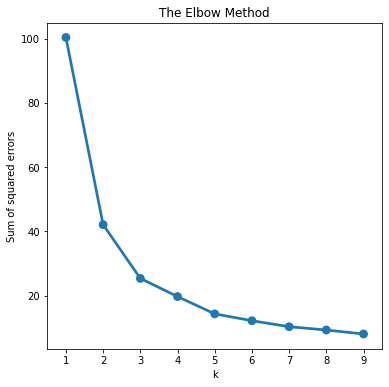

In [33]:
SSE = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_analysis.iloc[:, 3:6])
    SSE.append(kmeans.inertia_)

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')    
sns.pointplot(x=list(range(1,10)), y = SSE)
plt.show()

Next, I built 'snakeplots' to visually observe how different number of clusters affects the segmentation. It can be observed below that for 3 clusters, the segmentation was clear and straightforward. Whereas for 4 and 5 number of clusters, the segmentation was more overlapping and less intutive. In real life, the final decision regarding number of clusters to be used would involve domain expertise. For the sake of problem solving in this notebook, I chose 3 clusters as this segmented customers in a format wherein I could provide clear-cut actionable insights. 

In [34]:
# Build k-means clustering model
kmeans = KMeans(n_clusters=4, max_iter=400, n_init=20, random_state=0).fit(df_analysis.iloc[:, 3:6])
df_analysis['cluster'] = kmeans.labels_

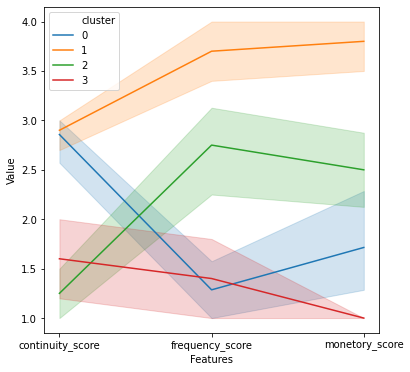

In [35]:
df_melted = pd.melt(df_analysis.reset_index(), id_vars=['cluster'], value_vars=['continuity_score', 'frequency_score', 'monetory_score'], var_name = 'Features', value_name='Value')
sns.lineplot('Features', 'Value', hue='cluster', data = df_melted, palette='tab10')
plt.legend();

In [36]:
kmeans = KMeans(n_clusters=5, max_iter=400, n_init=20, random_state=0).fit(df_analysis.iloc[:, 3:6])
df_analysis['cluster'] = kmeans.labels_

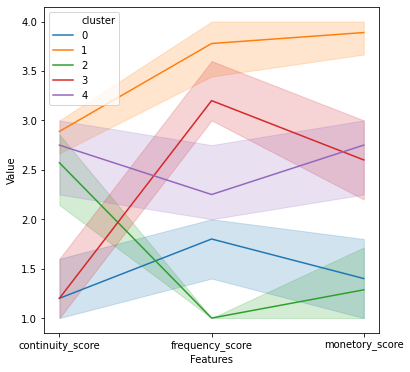

In [37]:
df_melted = pd.melt(df_analysis.reset_index(), id_vars=['cluster'], value_vars=[
                    'continuity_score', 'frequency_score', 'monetory_score'], var_name='Features', value_name='Value')
sns.lineplot('Features', 'Value', hue='cluster', data=df_melted, palette='tab10')
plt.legend();

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=400, n_init=20, random_state=0).fit(df_analysis.iloc[:, 3:6])
center = kmeans.cluster_centers_
df_analysis['cluster'] = kmeans.labels_

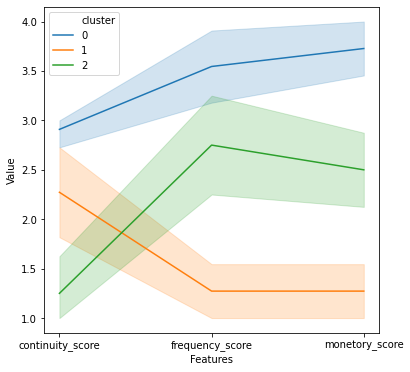

In [39]:
df_melted = pd.melt(df_analysis.reset_index(), id_vars=['cluster'], value_vars=[
                    'continuity_score', 'frequency_score', 'monetory_score'], var_name='Features', value_name='Value')
sns.lineplot('Features', 'Value', hue='cluster', data=df_melted, palette='tab10')
plt.legend();

3 clusters resulted in the best customer segmentation and therefore I chose this particular model as the final one. 

The centroids for the three clusters (0,1,2) are as shown below.

In [40]:
pd.DataFrame(center, columns=['continuity_score', 'frequency_score', 'monetory_score'])

,continuity_score,frequency_score,monetory_score
0,2.909091,3.545455,3.727273
1,2.272727,1.272727,1.272727
2,1.250000,2.750000,2.500000


The cluster labels have been appended as a column at the end of dataframe. Therefore, the assignment of each customer to a specific cluster can be found (e.g., row 0 corresponds to customer C1 and they have been assigned to cluster 0 and so on).

In [41]:
df_analysis

,continuity,frequency,monetory,continuity_score,frequency_score,monetory_score,cluster
0,1.000000,0.392262,0.499433,3,3,4,0
1,0.954774,0.417063,0.374379,3,3,3,0
2,1.000000,0.085187,0.326215,3,1,2,1
3,1.000000,0.502891,0.583704,3,4,4,0
4,1.000000,0.712279,0.800459,3,4,4,0
5,1.000000,0.119145,0.148513,3,1,1,1
6,0.874372,0.256829,0.426349,3,2,3,0
7,1.000000,0.445705,0.584007,3,4,4,0
8,0.668342,0.331666,0.276316,2,2,1,1
9,1.000000,0.571618,0.643503,3,4,4,0


# Insights

The customers were divided into 3 segments (refer plot below). The insights for each segment are as given below:

Cluster 0 : (C1, C2, C4, C5, C7, C8, C10, C11, C14, C15, C16)

This cluster represents the best customer for our business. Folks in this group are buying items across different product types consistently. The number of items they are buying and the overall money they are spending with the buisness is also high. New, expensive product launches can be aimed at this sub-group as they are the highest spending and most loyal customer base. Also, it doesn't make sense to spend too much marketing and advertisement budget on this group as they are already happy with our business. It makes sense to redirect these funds on other groups to maximize profit for our company. Whatever is being done to engage this group of customers so far is working and there is no immediate incentive to change our approach towards this segment.  

Cluster 1 : (C3, C6, C9, C12, C13, C18, C19, C20, C24, C27, C29)

Customers in this segment are buying items fairly continuously across different product types. However, in these purchases they are buying few items and these items are not of really high price and therefore, the total positive monetary input they are having for our business is relatively small. I would suggest that we should have targetted Ad campaigns for this group and we can give them discounts on certain higher priced products to pique their interest and drive their overall spending at our business. Also, we can incentize purchase of more item numbers by providing offers like buy 2 get 1 free etc. There is a lot of untapped growth potential in this segment and marketing efforts should be put in to materialize the same.   

Cluster 2 : (C17, C21, C22, C23, C25, C26, C28, C30)

Customers in this segment are not buying continuously across different product options. One way to influence this behaviour for the benefit of the company would be to incentivise these customers to buy across different products consistently by giving discounts/coupons for more diversified product-type buying behaviour. Also, these customers seem to be buying more of lower valued items (apparent from higher frequency score but not so high monetory score). Therefore, to build customer trust we can offer them higher priced items at highly discounted prices for sometime. Once the customer uses those higher priced products for some time, they will appreciate their quality/usefulness. Later we can withdraw the discount schemes and hopefully, customer would start buying those higher priced products at their original (higher) price, thus driving profit for our business.  

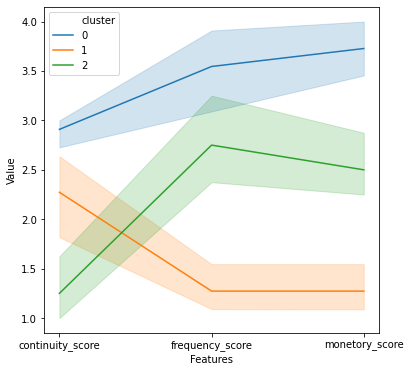

In [42]:
sns.lineplot('Features', 'Value', hue='cluster', data=df_melted, palette='tab10')
plt.legend();

# Future Improvements

Down below are a few suggestions that can be implemented in future:

1. Density based clustering algorithms (like DBSCAN) can be implemented to see if they lead to better segmentation. DBCAN has the added advantage that it can identify outliers as well.

2. Bottom-up hierarchichal clustering approach can also be used in the analysis.

3. Weightage can be give to different product types in the continuity variable computation. Say as a business we are interested in selling product P1 more. We can then penalise a customer more if they do not buy product P1 regularly by including appropriate weights while calculating continuity variable.

